<a href="https://colab.research.google.com/github/PPareun/DeepLearningTextBook/blob/main/Keyword_Extractor/Keyword_Ver1/KeywordFromCosSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 43.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 73.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=59fe72815079a5aacbc9b2aa175c2374fe89fc66e51baeabb29ae7a66ae1c5f2
  Stored in director

In [ ]:
import nltk

In [ ]:
import numpy as np
import itertools
import re
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [ ]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#폰트 설치
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

Downloading:   0%|          | 0.00/574 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
han = Hannanum()
def preprocess(text : str):
  text = re.sub(r"[\(\)]"," ", text)
  text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s-]", "", text)
  tokens = list(han.pos(text))
  relist = []
  N = len(tokens)
  index = 0
  flag = False
  while(index<N):
    if(flag == True):
      flag = False
    elif tokens[index][0] == '-' and 0<index<len(tokens)-1:
      relist[-1][0]+= tokens[index][0]+tokens[index+1][0]
      flag = True
    else:
      relist.append([tokens[index][0],tokens[index][1]])
    index+=1
  return relist

In [ ]:
AI_keywords = ['인공지능', '머신러닝', '딥러닝','ai', '데이터', '강화학습','cnn', 'convolutional neural network','인공신경망', 'rnn', 'lstm', 'gru']

In [ ]:
text = ('"""' + input() + '"""')
tokens = preprocess(text)
nouns = ' '.join([word[0] for word in tokens if word[1] == 'N' or word[1] == 'F'])
print(nouns)

마이크로소프트(MS)가 ‘초거대 AI’를 자사 검색엔진에 도입한다. 구글에 완패한 검색 시장에서 초거대 AI로 판세를 뒤집겠다는 전략이다. 초거대 AI에 대한 관심이 높아지면서, 한국 기업들도 앞다퉈 서비스를 준비하고 있다.  MS는 빠르면 3월에 오픈AI의 ‘챗GPT’를 검색엔진 빙(Bing)에 적용할 계획이라고 미국 경제매체 더 인포메이션 등이 9일(현지시간) 보도했다. 챗GPT는 오픈AI의 언어모델 GPT-3.5를 기반으로 만든 AI 챗봇 서비스다. 인간과 채팅하는 것처럼 자연스럽게 대화할 수 있는 게 특징이다. 방대한 학습 데이터를 기반으로 ‘양자 컴퓨팅을 간략하게 설명해줘’ ‘10살 아이에게 생인 선물로 뭐가 좋을까’ 같은 질문을 하면 충실하게 답을 해준다.  구글 검색이 키워드를 중심으로 한다면, 챗GPT는 인간이 쓰는 자연어를 기반으로 한다. 때문에 이용하기 쉽다. 학습할수록 대화 내용이 풍부해져 조만간 모든 검색이 챗GPT로 대체된다는 전망까지 나온다.     MS는 2019년 오픈AI에 10억 달러를 투자하고 2020년 GPT-3 기반의 기술사용에 대한 독점 사용권을 구매하기도 했다. 추가로 100억 달러를 투자해 오픈AI 지분 49%를 인수하려고 시도 중인 것으로 알려졌다. MS는 워드, 엑셀, 아웃룩 등 오피스 제품군에도 챗GPT를 도입할 계획으로 전해진다. 워드의 경우 문장 자동완성 기능에 챗GPT를 적용했고, 아웃룩에는 ‘팀원들에게 아프다고 메일을 보내줘’라고 하면 알맞은 내용을 작성해 자동으로 메일을 보내주는 식이다.  그러나 챗GPT가 아직까지 부정확한 정보를 알려주는 사례가 있고, 개인 정보보호 측면에서 보완할 점이 있다는 게 걸림돌이 될 수 있다고 IT매체 더 버지는 지적했다. 초거대 AI는 방대한 데이터를 학습해 인간처럼 종합 추론을 할 수 있는 AI다. 과거 ‘알파고’ 같은 AI는 바둑에 특화됐지만 다른 용도로 쓸 수 없었다. 반면 초거대 AI는 범용성을 갖출 수 있다. 몇 가지 메시지를 바탕으로 그림을 그리고 작곡을 하며 코

In [ ]:
n_gram = (1, 2)
noun_counts = CountVectorizer(ngram_range= n_gram).fit([nouns])
keywords = noun_counts.get_feature_names_out()

In [ ]:
text_embedding = model.encode([text])
AI_embedding = model.encode(AI_keywords)
keyword_embedding = model.encode(keywords)

In [ ]:
print(cosine_similarity(AI_embedding, text_embedding).sum())

0.1400797


In [ ]:
key_AI = cosine_similarity(keyword_embedding, AI_embedding) #AI 키워드, 텍스트 명사 유사도
key_text = cosine_similarity(keyword_embedding, text_embedding) #텍스트 명사, 문단 유사도
AI_text = cosine_similarity(AI_embedding,text_embedding) #AI 키워드, 문단 유사도
key_AI_sum = np.array([cos_sim.sum() for cos_sim in key_AI])
key_AI_sum /= key_AI_sum.sum()
for i in range(len(key_text)):
  key_AI_sum += (key_text[i]/key_text.sum())
kwds_list = [keywords[index] for index in key_AI_sum.argsort()[:-20:-1]]
print(kwds_list)

['vesta', 'dgl', 'etc vesta', 'gnn', 'ieee', 'isp', 'be', 'etc', 'in', 'as', 'provided in', 'of', 'is', 'on', 'are', 'to', 'from', 'or', 'defined as']


Counter({'Vesta': 2, 'ETC': 2, 'IN': 2, 'AS': 2, 'DGL': 1, 'ETC Vesta': 1, 'GNN': 1, 'Ieee': 1, 'ISP': 1, 'BE': 1, 'Provided': 1, 'Provided IN': 1, 'OF': 1, 'IS': 1, 'ON': 1, 'ARE': 1, 'TO': 1, 'From': 1, 'OR': 1, 'Defined': 1, 'Defined AS': 1})


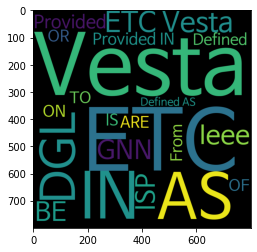

In [ ]:
words = []
Cwords = []
for concat_words in kwds_list:
  words.extend(CountVectorizer(ngram_range= (1, n_gram[1])).fit([concat_words]).get_feature_names_out())
for cword in words:
  word = cword.split(' ')
  Cwords.append ( ' '.join(map(lambda x: (x.capitalize() if len (x)>3 else x.upper()), word)))
counter_cwords = Counter(Cwords)
sorted_kwds = sorted(Counter(Cwords).items(), key = lambda x : x[1], reverse = True)
if sorted_kwds[0][0].lower() not in AI_keywords:
  AI_keywords.append(sorted_kwds[0][0].lower()) # 첫번째 값 AI_keywords에 업데이트
print(counter_cwords)
wc = WordCloud(font_path = path, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(Counter(Cwords))
plt.figure()
plt.imshow(gen)

In [ ]:
Artificial Intelligence has been advancing at an incredibly fast pace of late and last year saw the emergence of several useful tools. Image generators showed us how AI can be used to create high-quality art in a matter of seconds, while chatbots have already started writing essays for us. But perhaps the most popular in these two categories are OpenAI products ChatGPT and Dall-E, both of which are built on top of the GPT (Generative Pre-trained Transformer) language model. Here’s how you can sign up for both and begin experiencing them immediately.
How to sign up for ChatGPT
Launched on November 30 last year, ChatGPT is an extremely capable AI chatbot that can respond to queries just like a human would, answer follow-up questions, and even admit its mistakes. It is based on the company’s GPT 3.5 series of language learning models (LLM), which uses deep learning techniques to produce human-like text based on inputs.
chatgpt The ChatGPT interface (Express photo)
Currently, ChatGPT is available to access for all users in beta. To try it you’d first have to open up chat.openai.com on any browser on any platform. While the bot is free to use, you’ll have to create an OpenAI account first in order to access it.

The ChatGPT site will prompt you to sign up/login if you aren’t already logged in. You can sign up using an email ID or a Google or Microsoft account.
Also Read |OpenAI’s ChatGPT is seen as a path-breaking chatbot for AI. But experts are not impressed
Once the account has been created, just drop a “Hi” into the text field at the bottom of ChatGPT interface to start a conversation.
How to sign up for Dall-E
Dall-E is also a language model like ChatGPT, except it produces pictures rather than text. It was trained on a large number of images with accompanying captions, allowing it to create original images from scratch from nothing but text descriptions.
You can feed it extremely specific text descriptions and still expect workable output. While the first version of the image generator that was launched in January 2021 had limited ability, Dall-E 2 generates images that are almost photorealistic.
ADVERTISEMENT

Dall-E 2 was first opened to everyone on September 28, with its waitlist requirement being done away with. If you’ve already created an OpenAI account using the steps above, then all you need to do is login in order to start using it. You can access it from openai.com/dall-e-2/.
A DALL-E 2 output from text description “Toyota Prius in a cyberpunk themed city” (Express photo)
If you don’t have an account, then head to the website above and tap on the sign-up button at the top. You can sign up using an email ID or a Google or Microsoft account.
Also Read |AI can now generate art: A look at popular tools you can use to experience this
Once signed up, you will get 50 free credits. Each time you get Dall-E to generate something for you, some of these credits will be used. You will receive 15 free credits every month after the first. You can buy more credits if you run out.
ADVERTISEMENT

Using Dall-E is simple. All you need to do is enter a text prompt into the text field you’ll see on the Dall-E interface and hit enter. Dall-E will take some time to generate images. When done, it’ll output four unique images for you.